In [1]:
# Solving a 1D diffusion equation with a fixed concentration 
# at the left boundary and a closed boundary on the right side

In [2]:
import matplotlib.pyplot as plt
import pyfvtool as pf

In [3]:
Nx = 20 # number of finite volume cells
Lx = 1.0 # [m] length of the domain 
c_left = 1.0 # left boundary concentration
c_init = 0.0 # initial concentration
D_val = 1e-5 # diffusion coefficient (gas phase)
t_simulation = 3600.0 # [s] simulation time
dt = 60.0 # [s] time step

In [4]:
m1 = pf.Grid1D(Nx, Lx) # mesh object

In [5]:
# create a cell variable with initial concentration
c = pf.CellVariable(m1, c_init)

In [6]:
# switch the left boundary to Dirichlet: fixed concentration
c.BCs.left.a = 0.0
c.BCs.left.b = 1.0
c.BCs.left.c = c_left

In [7]:
# assign diffusivity to cell faces
D_face = pf.FaceVariable(m1, D_val) # average value of diffusivity at the interfaces between cells

In [8]:
# time loop
t = 0.0
while (t<t_simulation):
    pf.solvePDE(c, [ pf.transientTerm(c, dt, 1.0),
                    -pf.diffusionTerm(D_face)])
    t+=dt

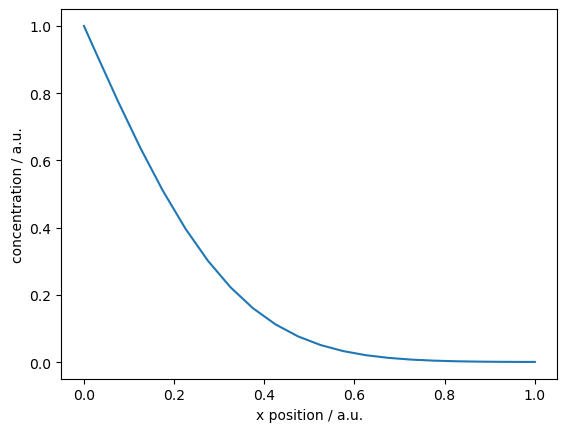

In [9]:
pf.visualizeCells(c)
plt.xlabel('x position / a.u.')
plt.ylabel('concentration / a.u.');